first im going to import the packages that i need to start this assignment 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import json5 as js
import base64
import requests

then im calling on my keys and bearer tokens to gain access to the spotify API 

In [3]:
keys = pd.read_csv('spotify.txt', sep = ",", header = 0)
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid+":"+ appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header,data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization' : 'Bearer {}'.format(response.json()['access_token'])}

Now im grabbing the playlist IDs along with requesting the link to the spotify API

In [4]:
Playlist_1 = '439oBnNyLGO8S8ZZR139lh'
Playlist_2 = '6aFQL95GlX8VfCmVAij8uD'
Playlist_3 = '2mgo5Gj5goJhyn9tVKjKSs'
P1_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(Playlist_1)
P2_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(Playlist_2)
P3_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(Playlist_3)
P1_tracks = requests.get(P1_endpoint, headers = session_header)
P2_tracks = requests.get(P2_endpoint, headers = session_header)
P3_tracks = requests.get(P3_endpoint, headers = session_header)

This is loading the tracks and ids for them so when i call in a dataframe it shows the id

In [5]:
P1_dict = js.loads(P1_tracks.text)
P1_track_ids = [x['track']['id'] for x in P1_dict['items']]
P2_dict = js.loads(P2_tracks.text)
P2_track_ids = [x['track']['id'] for x in P2_dict['items']]
P3_dict = js.loads(P3_tracks.text)
P3_track_ids = [x['track']['id'] for x in P3_dict['items']]

Gathering the endpoints for the features i can look at with each individual song on my playlists

In [6]:
P1_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in P1_track_ids))
P1_features = requests.get(P1_features_endpoint, headers = session_header)
P2_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in P2_track_ids))
P2_features = requests.get(P2_features_endpoint, headers = session_header)
P3_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(','.join(str(x) for x in P3_track_ids))
P3_features = requests.get(P3_features_endpoint, headers = session_header)

loading the features onto a text file on the dataframe so you can see what song has what feature. also creating the dataframe for each of the playlists

In [7]:
P1_dict = js.loads(P1_features.text)
P2_dict = js.loads(P2_features.text)
P3_dict = js.loads(P3_features.text)
P1_df = pd.DataFrame(P1_dict['audio_features'])
P2_df = pd.DataFrame(P2_dict['audio_features'])
P3_df = pd.DataFrame(P3_dict['audio_features'])
P1_df['Playlist'] = ['Playlist_1'] * len(P1_df.index)
P3_df['Playlist'] = ['Playlist_3'] * len(P3_df.index)

Playlist number 1 

In [8]:
P1_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Playlist
0,0.655,0.885,7,-4.116,1,0.0438,0.001170,0.000473,0.0448,0.938,100.088,audio_features,1fLlRApgzxWweF1JTf8yM5,spotify:track:1fLlRApgzxWweF1JTf8yM5,https://api.spotify.com/v1/tracks/1fLlRApgzxWw...,https://api.spotify.com/v1/audio-analysis/1fLl...,189293,4,Playlist_1
1,0.678,0.656,7,-6.410,1,0.0381,0.001740,0.000000,0.0631,0.485,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4,Playlist_1
2,0.350,0.828,6,-5.373,1,0.0410,0.000217,0.000161,0.0774,0.147,105.435,audio_features,2EoOZnxNgtmZaD8uUmz2nD,spotify:track:2EoOZnxNgtmZaD8uUmz2nD,https://api.spotify.com/v1/tracks/2EoOZnxNgtmZ...,https://api.spotify.com/v1/audio-analysis/2EoO...,318587,4,Playlist_1
3,0.577,0.828,6,-8.691,0,0.0298,0.002130,0.011400,0.0581,0.604,123.257,audio_features,5sICkBXVmaCQk5aISGR3x1,spotify:track:5sICkBXVmaCQk5aISGR3x1,https://api.spotify.com/v1/tracks/5sICkBXVmaCQ...,https://api.spotify.com/v1/audio-analysis/5sIC...,331267,4,Playlist_1
4,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880,4,Playlist_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.654,0.611,2,-10.450,1,0.1190,0.033700,0.000178,0.4050,0.786,85.387,audio_features,5PntSbMHC1ud6Vvl8x56qd,spotify:track:5PntSbMHC1ud6Vvl8x56qd,https://api.spotify.com/v1/tracks/5PntSbMHC1ud...,https://api.spotify.com/v1/audio-analysis/5Pnt...,235000,4,Playlist_1
90,0.382,0.867,9,-7.426,1,0.0399,0.000006,0.581000,0.1960,0.453,87.309,audio_features,3ow0TQVttXQF8rLckmXgRx,spotify:track:3ow0TQVttXQF8rLckmXgRx,https://api.spotify.com/v1/tracks/3ow0TQVttXQF...,https://api.spotify.com/v1/audio-analysis/3ow0...,298253,4,Playlist_1
91,0.451,0.962,0,-3.947,1,0.0734,0.018800,0.000003,0.2770,0.377,131.435,audio_features,4ECNtOnqzxutZkXP4TE3n3,spotify:track:4ECNtOnqzxutZkXP4TE3n3,https://api.spotify.com/v1/tracks/4ECNtOnqzxut...,https://api.spotify.com/v1/audio-analysis/4ECN...,323707,4,Playlist_1
92,0.394,0.944,10,-6.506,0,0.0761,0.001780,0.000005,0.2980,0.265,105.338,audio_features,6QewNVIDKdSl8Y3ycuHIei,spotify:track:6QewNVIDKdSl8Y3ycuHIei,https://api.spotify.com/v1/tracks/6QewNVIDKdSl...,https://api.spotify.com/v1/audio-analysis/6Qew...,292581,4,Playlist_1


Playlist number 2 

In [9]:
P2_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.319,0.236,5,-9.644,1,0.0318,0.8980,0.000016,0.2720,0.2540,162.351,audio_features,7CC6UbCs4iGsePSzFxYxNn,spotify:track:7CC6UbCs4iGsePSzFxYxNn,https://api.spotify.com/v1/tracks/7CC6UbCs4iGs...,https://api.spotify.com/v1/audio-analysis/7CC6...,156091,4
1,0.676,0.536,2,-8.790,1,0.0432,0.4030,0.000034,0.1050,0.3730,79.037,audio_features,58k32my5lKofeZRtIvBDg9,spotify:track:58k32my5lKofeZRtIvBDg9,https://api.spotify.com/v1/tracks/58k32my5lKof...,https://api.spotify.com/v1/audio-analysis/58k3...,172672,4
2,0.583,0.625,1,-8.011,1,0.2770,0.5060,0.000000,0.1960,0.5160,89.812,audio_features,0GAyuCo975IHGxxiLKDufB,spotify:track:0GAyuCo975IHGxxiLKDufB,https://api.spotify.com/v1/tracks/0GAyuCo975IH...,https://api.spotify.com/v1/audio-analysis/0GAy...,266291,4
3,0.726,0.478,1,-6.605,0,0.1070,0.6450,0.000003,0.1510,0.3380,74.992,audio_features,1IMgQoUuiOuieYRKYadkPr,spotify:track:1IMgQoUuiOuieYRKYadkPr,https://api.spotify.com/v1/tracks/1IMgQoUuiOui...,https://api.spotify.com/v1/audio-analysis/1IMg...,232511,4
4,0.485,0.720,6,-5.991,1,0.1270,0.0123,0.000000,0.0546,0.0471,207.982,audio_features,1j6kDJttn6wbVyMaM42Nxm,spotify:track:1j6kDJttn6wbVyMaM42Nxm,https://api.spotify.com/v1/tracks/1j6kDJttn6wb...,https://api.spotify.com/v1/audio-analysis/1j6k...,126960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.856,0.841,6,-7.737,0,0.3350,0.0977,0.000000,0.0773,0.7940,95.418,audio_features,7lT1dCz96jANsLAAADlfIg,spotify:track:7lT1dCz96jANsLAAADlfIg,https://api.spotify.com/v1/tracks/7lT1dCz96jAN...,https://api.spotify.com/v1/audio-analysis/7lT1...,298053,4
96,0.489,0.624,4,-1.916,0,0.0344,0.8340,0.347000,0.3250,0.5740,167.108,audio_features,6cmt9CRoK0KGcNg9Tpje53,spotify:track:6cmt9CRoK0KGcNg9Tpje53,https://api.spotify.com/v1/tracks/6cmt9CRoK0KG...,https://api.spotify.com/v1/audio-analysis/6cmt...,66133,4
97,0.695,0.827,6,-5.742,0,0.2820,0.1790,0.000000,0.2830,0.5380,81.024,audio_features,4WEuEfFiczWxblHyuucSBL,spotify:track:4WEuEfFiczWxblHyuucSBL,https://api.spotify.com/v1/tracks/4WEuEfFiczWx...,https://api.spotify.com/v1/audio-analysis/4WEu...,279855,4
98,0.509,0.787,7,-6.754,1,0.2650,0.3590,0.000028,0.2600,0.5070,114.449,audio_features,7Ks4VCY1wFebnOdJrM13t6,spotify:track:7Ks4VCY1wFebnOdJrM13t6,https://api.spotify.com/v1/tracks/7Ks4VCY1wFeb...,https://api.spotify.com/v1/audio-analysis/7Ks4...,287360,4


playlist number 3

In [10]:
P3_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Playlist
0,0.791,0.267,5,-11.997,1,0.0415,0.674000,0.534000,0.1020,0.5440,165.990,audio_features,01TyFEZu6mHbffsVfxgrFn,spotify:track:01TyFEZu6mHbffsVfxgrFn,https://api.spotify.com/v1/tracks/01TyFEZu6mHb...,https://api.spotify.com/v1/audio-analysis/01Ty...,215111,4,Playlist_3
1,0.559,0.871,5,-5.338,0,0.0397,0.000008,0.005450,0.0960,0.5720,104.970,audio_features,6dBUzqjtbnIa1TwYbyw5CM,spotify:track:6dBUzqjtbnIa1TwYbyw5CM,https://api.spotify.com/v1/tracks/6dBUzqjtbnIa...,https://api.spotify.com/v1/audio-analysis/6dBU...,213920,4,Playlist_3
2,0.501,0.547,1,-7.961,0,0.0243,0.225000,0.912000,0.2880,0.2250,87.692,audio_features,72cGBEqu7RitIOoACXYjfR,spotify:track:72cGBEqu7RitIOoACXYjfR,https://api.spotify.com/v1/tracks/72cGBEqu7Rit...,https://api.spotify.com/v1/audio-analysis/72cG...,227760,4,Playlist_3
3,0.486,0.617,5,-7.115,0,0.0287,0.095400,0.000003,0.1090,0.4170,138.015,audio_features,1mea3bSkSGXuIRvnydlB5b,spotify:track:1mea3bSkSGXuIRvnydlB5b,https://api.spotify.com/v1/tracks/1mea3bSkSGXu...,https://api.spotify.com/v1/audio-analysis/1mea...,242373,4,Playlist_3
4,0.285,0.613,5,-6.412,1,0.0421,0.018500,0.100000,0.1140,0.0772,126.628,audio_features,4FEr6dIdH6EqLKR0jB560J,spotify:track:4FEr6dIdH6EqLKR0jB560J,https://api.spotify.com/v1/tracks/4FEr6dIdH6Eq...,https://api.spotify.com/v1/audio-analysis/4FEr...,413347,4,Playlist_3
5,0.413,0.881,11,-5.541,0,0.0367,0.000060,0.000308,0.0805,0.3640,158.066,audio_features,5UWwZ5lm5PKu6eKsHAGxOk,spotify:track:5UWwZ5lm5PKu6eKsHAGxOk,https://api.spotify.com/v1/tracks/5UWwZ5lm5PKu...,https://api.spotify.com/v1/audio-analysis/5UWw...,250547,4,Playlist_3
6,0.534,0.393,11,-7.813,1,0.0292,0.004790,0.010700,0.1070,0.0641,110.007,audio_features,0OYcEfskah1egYHjYRvbg1,spotify:track:0OYcEfskah1egYHjYRvbg1,https://api.spotify.com/v1/tracks/0OYcEfskah1e...,https://api.spotify.com/v1/audio-analysis/0OYc...,290360,4,Playlist_3
7,0.458,0.510,10,-10.424,0,0.0409,0.335000,0.004250,0.1050,0.2750,193.947,audio_features,2ysXuQd8uOfSMZcMRR5Ux4,spotify:track:2ysXuQd8uOfSMZcMRR5Ux4,https://api.spotify.com/v1/tracks/2ysXuQd8uOfS...,https://api.spotify.com/v1/audio-analysis/2ysX...,196747,4,Playlist_3
8,0.636,0.676,2,-3.442,1,0.0263,0.080700,0.000000,0.0831,0.2730,113.980,audio_features,2tznHmp70DxMyr2XhWLOW0,spotify:track:2tznHmp70DxMyr2XhWLOW0,https://api.spotify.com/v1/tracks/2tznHmp70DxM...,https://api.spotify.com/v1/audio-analysis/2tzn...,208760,4,Playlist_3
9,0.745,0.619,4,-10.939,0,0.0331,0.207000,0.012600,0.1330,0.0906,107.025,audio_features,0MUzalPwRItswsuNThydQg,spotify:track:0MUzalPwRItswsuNThydQg,https://api.spotify.com/v1/tracks/0MUzalPwRIts...,https://api.spotify.com/v1/audio-analysis/0MUz...,208200,4,Playlist_3


**Now i need to start my analysis plan**                                        .                                        


im going to select the features that can play a big role in figuring out why i listen to a certain playlist

Before i continue more i would like to state that playlist 1 is a rock based album, playlist 2 is a hip hop based album and playlist 3 is a calmer indie album

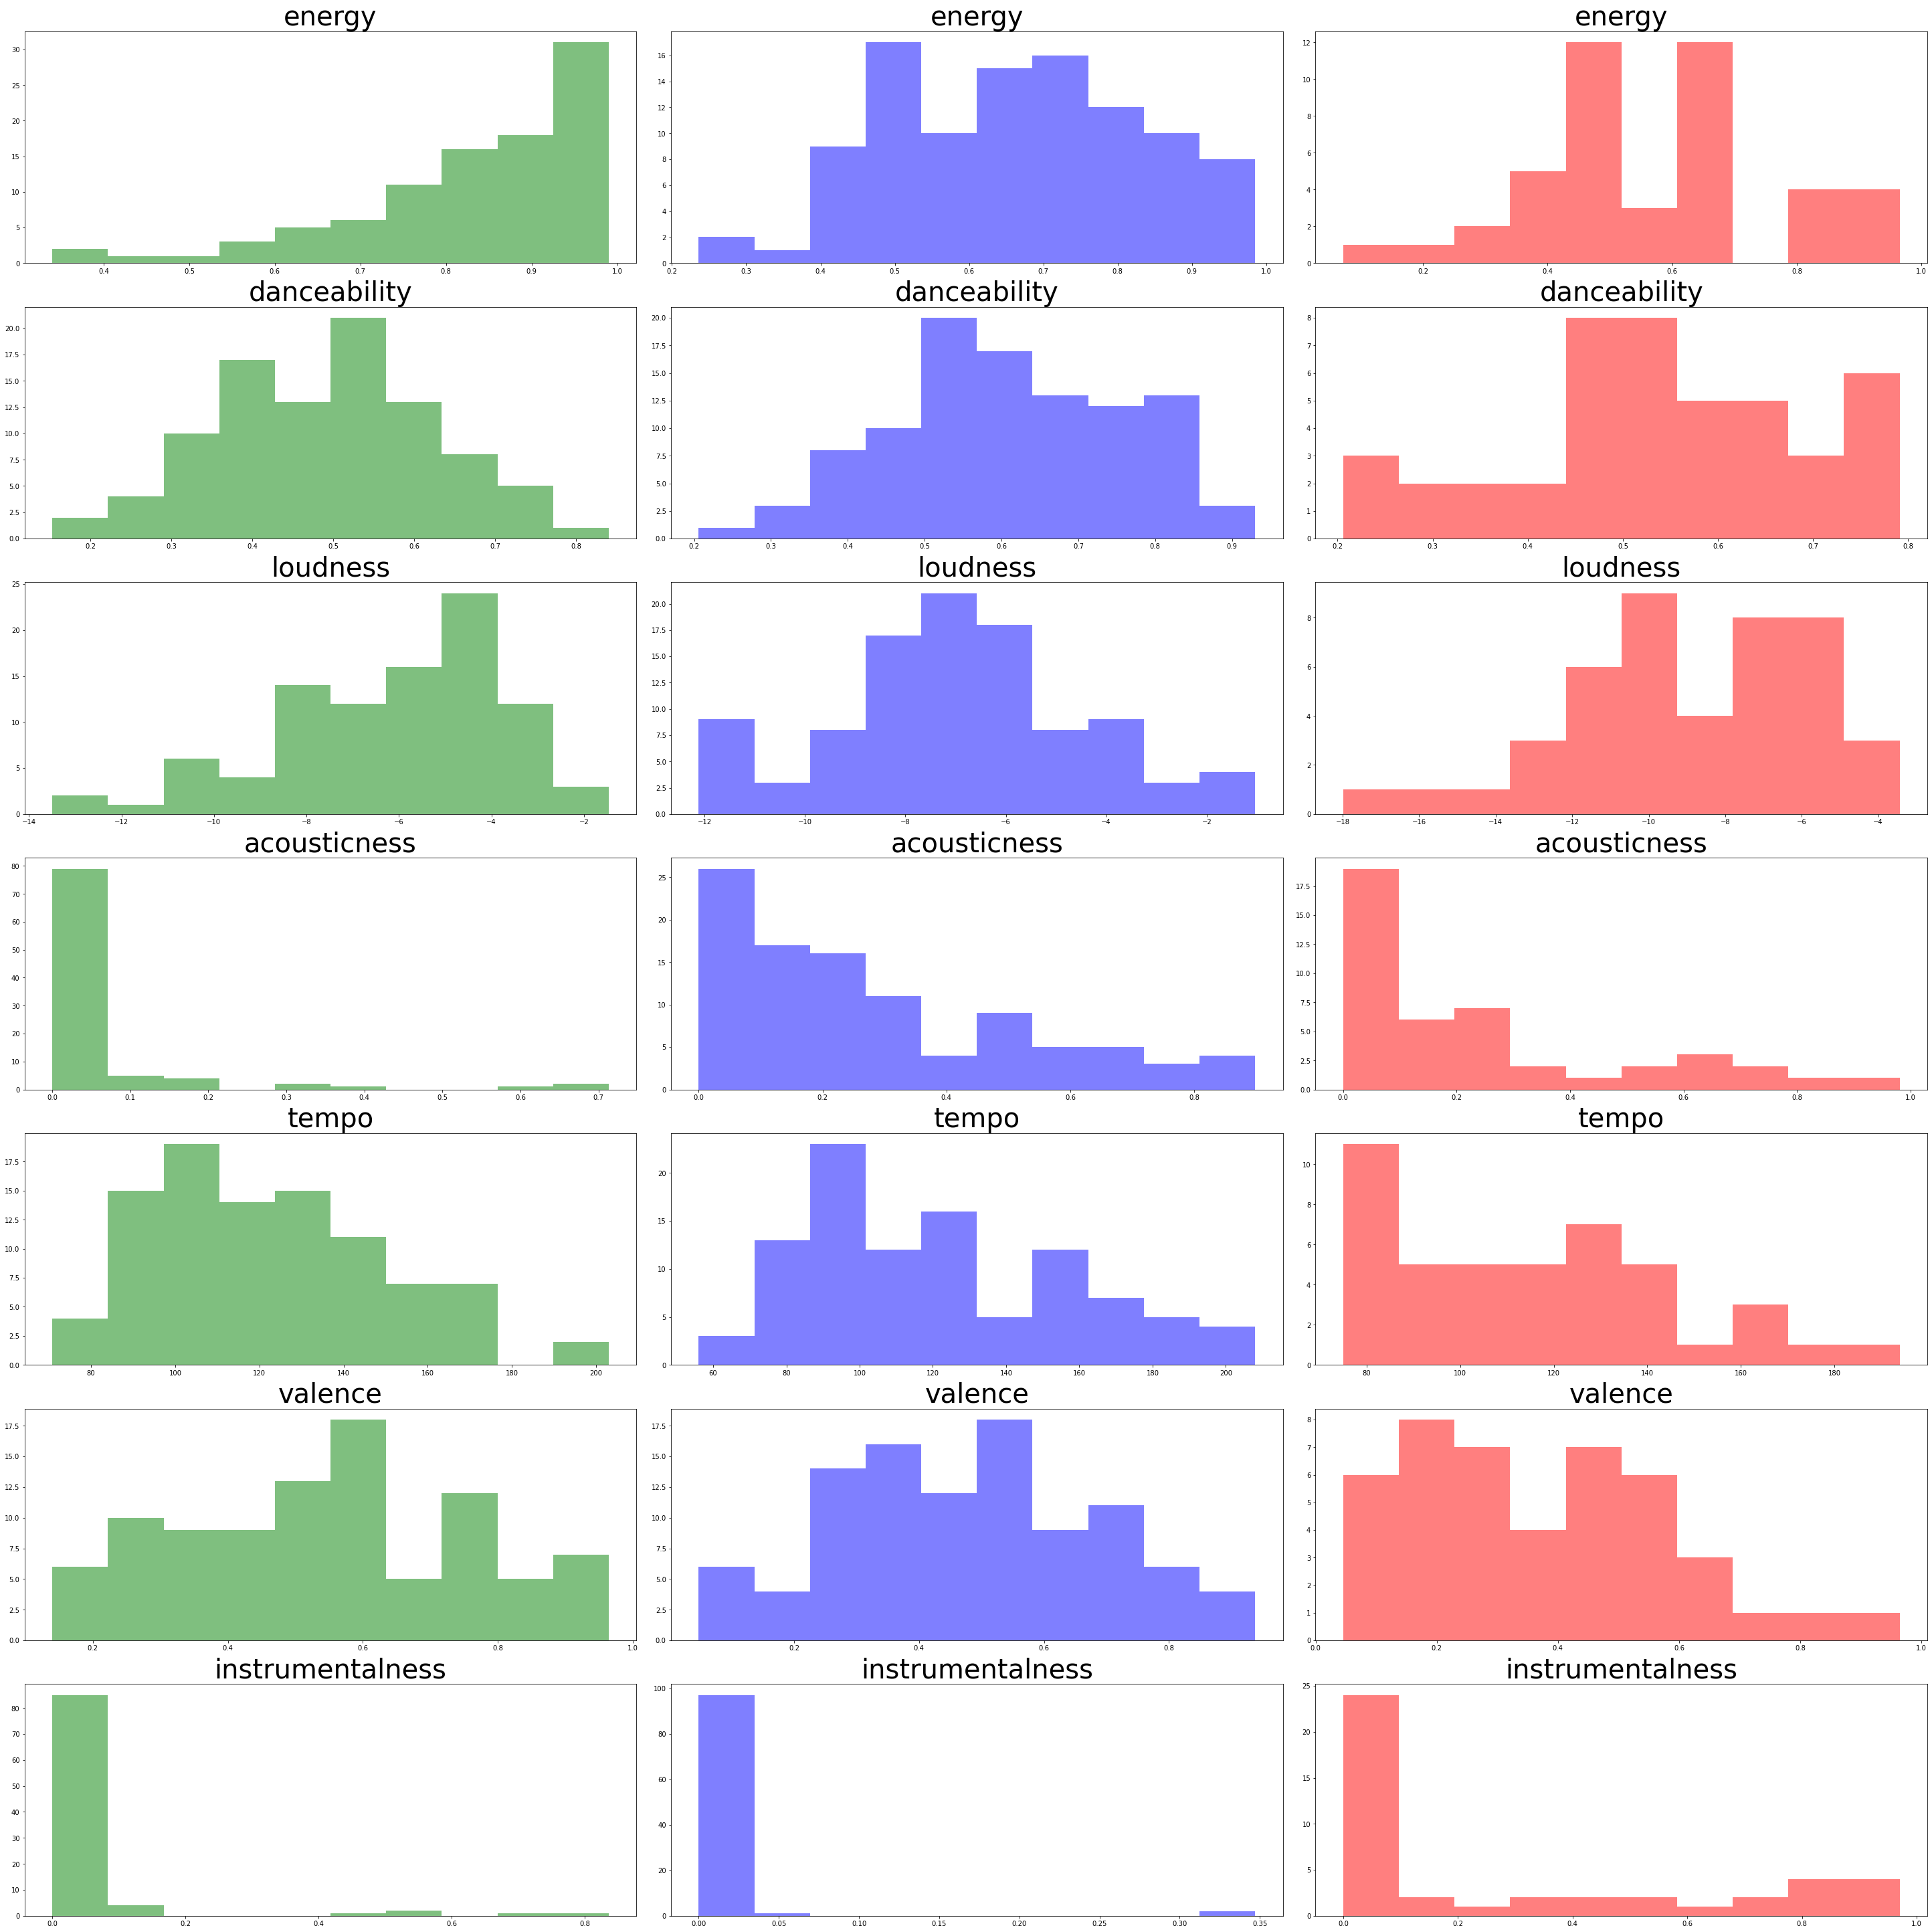

In [23]:
fig1, ax1 = plt.subplots(7,3, layout = 'constrained', figsize = (40,40))
ax1[0,0].set_title("energy", size = 40)
ax1[0,1].set_title("energy",size = 40)
ax1[0,2].set_title("energy",size = 40)
ax1[0,0].hist(P1_df['energy'], color  = 'green',alpha = 0.5)
ax1[0,1].hist(P2_df['energy'], color  = 'blue',alpha = 0.5)
ax1[0,2].hist(P3_df['energy'], color  = 'red',alpha = 0.5)

ax1[1,0].set_title("danceability", size = 40)
ax1[1,1].set_title("danceability",size = 40)
ax1[1,2].set_title("danceability",size = 40)
ax1[1,0].hist(P1_df['danceability'], color  = 'green',alpha = 0.5)
ax1[1,1].hist(P2_df['danceability'], color  = 'blue',alpha = 0.5)
ax1[1,2].hist(P3_df['danceability'], color  = 'red',alpha = 0.5)

ax1[2,0].set_title("loudness", size = 40)
ax1[2,1].set_title("loudness",size = 40)
ax1[2,2].set_title("loudness",size = 40)
ax1[2,0].hist(P1_df['loudness'], color  = 'green',alpha = 0.5)
ax1[2,1].hist(P2_df['loudness'], color  = 'blue',alpha = 0.5)
ax1[2,2].hist(P3_df['loudness'], color  = 'red',alpha = 0.5)

ax1[3,0].set_title("acousticness",size = 40)
ax1[3,1].set_title("acousticness",size = 40)
ax1[3,2].set_title("acousticness",size = 40)
ax1[3,0].hist(P1_df['acousticness'], color  = 'green',alpha = 0.5)
ax1[3,1].hist(P2_df['acousticness'], color  = 'blue',alpha = 0.5)
ax1[3,2].hist(P3_df['acousticness'], color  = 'red',alpha = 0.5)

ax1[4,0].set_title("tempo",size = 40)
ax1[4,1].set_title("tempo",size = 40)
ax1[4,2].set_title("tempo",size = 40)
ax1[4,0].hist(P1_df['tempo'], color  = 'green',alpha = 0.5)
ax1[4,1].hist(P2_df['tempo'], color  = 'blue',alpha = 0.5)
ax1[4,2].hist(P3_df['tempo'], color  = 'red',alpha = 0.5)

ax1[5,0].set_title("valence",size = 40)
ax1[5,1].set_title("valence",size = 40)
ax1[5,2].set_title("valence",size = 40)
ax1[5,0].hist(P1_df['valence'], color  = 'green',alpha = 0.5)
ax1[5,1].hist(P2_df['valence'], color  = 'blue',alpha = 0.5)
ax1[5,2].hist(P3_df['valence'], color  = 'red',alpha = 0.5)

ax1[6,0].set_title("instrumentalness",size = 40)
ax1[6,1].set_title("instrumentalness",size = 40)
ax1[6,2].set_title("instrumentalness",size = 40)
ax1[6,0].hist(P1_df['instrumentalness'], color  = 'green',alpha = 0.5)
ax1[6,1].hist(P2_df['instrumentalness'], color  = 'blue',alpha = 0.5)
ax1[6,2].hist(P3_df['instrumentalness'], color  = 'red',alpha = 0.5)
plt.show()

Im seeing alot of similarities suprisingly between the playlists despite them being from completely different genres\
To better show how different they are im going to compare each of these in a singular plot for each feature instead of seperating them 


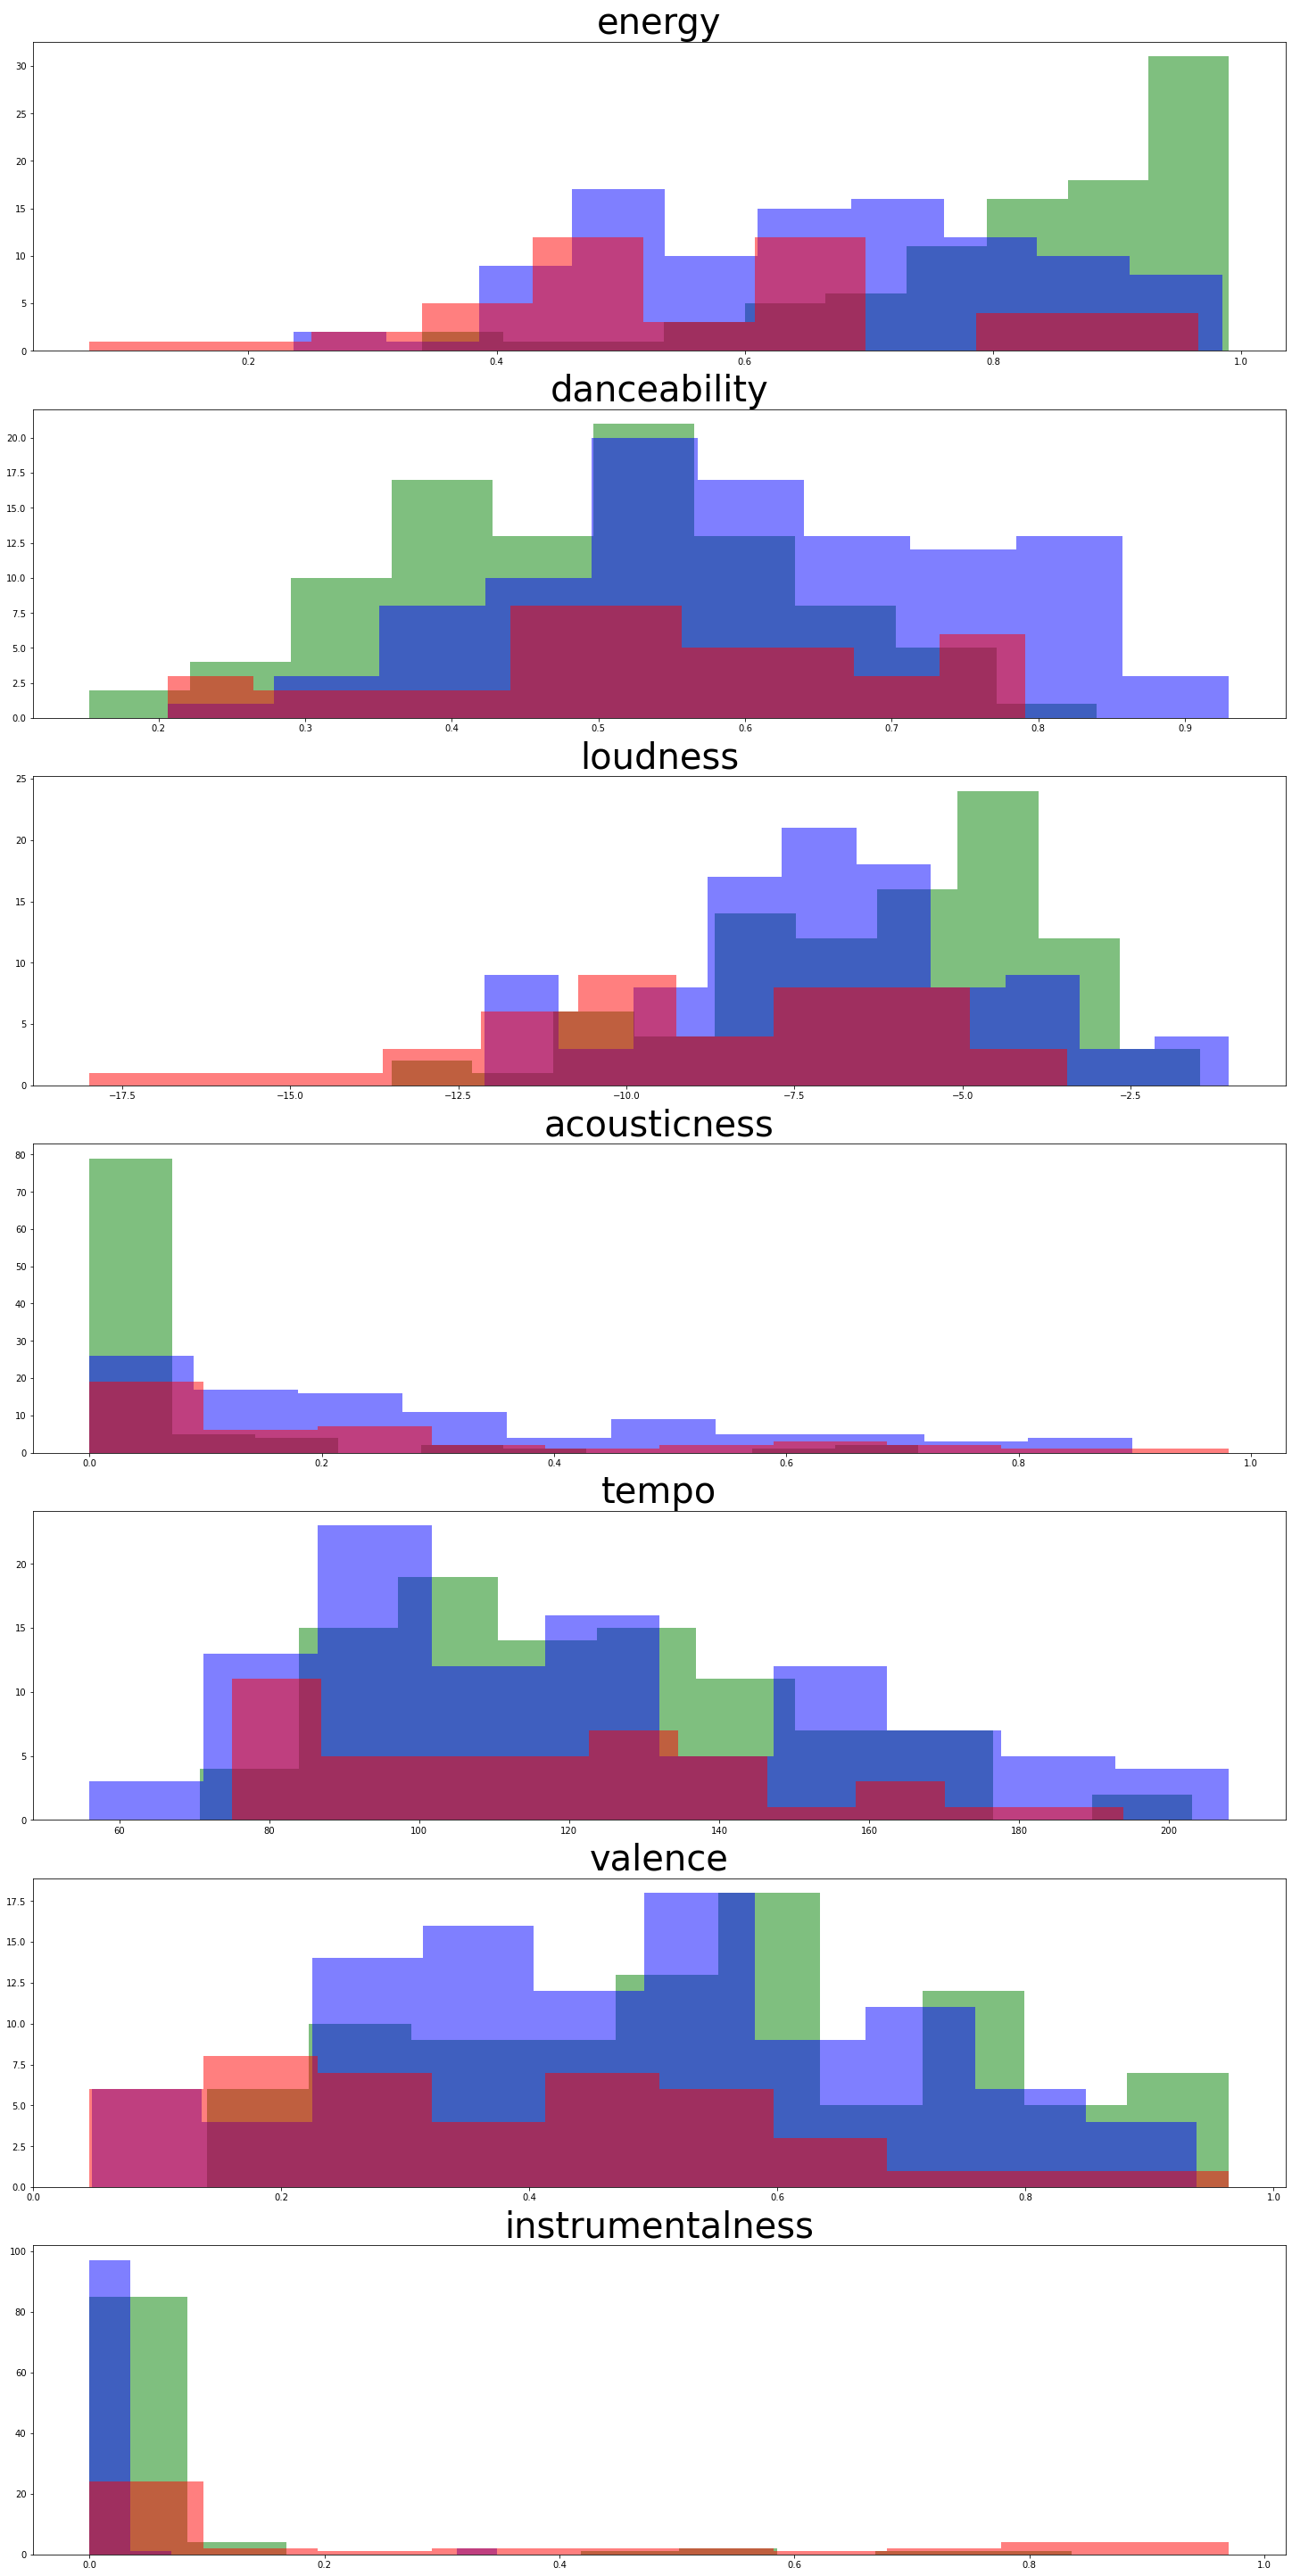

In [32]:
fig1, ax1 = plt.subplots(7,1, layout = 'constrained', figsize = (20,40))
ax1[0].set_title("energy", size = 40)
ax1[0].hist(P1_df['energy'], color  = 'green',alpha = 0.5)
ax1[0].hist(P2_df['energy'], color  = 'blue',alpha = 0.5)
ax1[0].hist(P3_df['energy'], color  = 'red',alpha = 0.5)

ax1[1].set_title("danceability", size = 40)
ax1[1].hist(P1_df['danceability'], color  = 'green',alpha = 0.5)
ax1[1].hist(P2_df['danceability'], color  = 'blue',alpha = 0.5)
ax1[1].hist(P3_df['danceability'], color  = 'red',alpha = 0.5)

ax1[2].set_title("loudness", size = 40)
ax1[2].hist(P1_df['loudness'], color  = 'green',alpha = 0.5)
ax1[2].hist(P2_df['loudness'], color  = 'blue',alpha = 0.5)
ax1[2].hist(P3_df['loudness'], color  = 'red',alpha = 0.5)

ax1[3].set_title("acousticness",size = 40)
ax1[3].hist(P1_df['acousticness'], color  = 'green',alpha = 0.5)
ax1[3].hist(P2_df['acousticness'], color  = 'blue',alpha = 0.5)
ax1[3].hist(P3_df['acousticness'], color  = 'red',alpha = 0.5)

ax1[4].set_title("tempo",size = 40)
ax1[4].hist(P1_df['tempo'], color  = 'green',alpha = 0.5)
ax1[4].hist(P2_df['tempo'], color  = 'blue',alpha = 0.5)
ax1[4].hist(P3_df['tempo'], color  = 'red',alpha = 0.5)

ax1[5].set_title("valence",size = 40)
ax1[5].hist(P1_df['valence'], color  = 'green',alpha = 0.5)
ax1[5].hist(P2_df['valence'], color  = 'blue',alpha = 0.5)
ax1[5].hist(P3_df['valence'], color  = 'red',alpha = 0.5)

ax1[6].set_title("instrumentalness",size = 40)
ax1[6].hist(P1_df['instrumentalness'], color  = 'green',alpha = 0.5)
ax1[6].hist(P2_df['instrumentalness'], color  = 'blue',alpha = 0.5)
ax1[6].hist(P3_df['instrumentalness'], color  = 'red',alpha = 0.5)
plt.show()

seeing this makes it more clear, the rock album has more energy between all tracks with over 30 at max energy with just a few outliers sitting in places right next to it while hiphop stands near the middle, and as expected, the calmer indie is pretty much non existant on the energy scale with it peaking at 0.4

Danceability and instrumenalness are both very similar across each playlist. mostly all the songs on each of these playlists sit with each other in those categories. 

seeing all of these compiled i have decided to leave out instrumentalness because it doesnt really show that great of data. In the near future I will take the other six and pair them up and use a scatter plot to show if one feature effect the other.

I will pair valence and acousticness, Loudness and Energy and Danceability and Tempo

